In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import lime
from lime.lime_tabular import LimeTabularExplainer

# Load data
features = pd.read_excel('LIME.xlsx')
label1 = features['2Nf'].to_numpy()
label1 = label1 / 2
features = features.drop(['2Nf'], axis=1)
feature_names = features.columns  # Extract column names before conversion
features = MinMaxScaler().fit_transform(features)
label1 = np.log(label1)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, label1, test_size=0.25, random_state=42)

# Convert feature names to a list
feature_names_list = list(feature_names)

# Increase the weight of the 'T' feature
X_val_weighted = X_val.copy()  # Make a copy of the validation set

# Identify the index of the 'T' feature in the feature names list
t_feature_index = feature_names_list.index('T')

# Increase the values of the 'T' feature in the validation set
T_multiplier = 2  # Adjust this multiplier as needed
X_val_weighted[:, t_feature_index] *= T_multiplier

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Create the LIME explainer
explainer = LimeTabularExplainer(X_train, feature_names=feature_names_list,
                                 class_names=['log(2Nf/2)'], verbose=True, mode='regression')

# Choose an instance to explain (for example, the first instance in the validation set)
instance_index = 0
instance = X_val_weighted[instance_index]

# Explain the prediction for the chosen instance
explanation = explainer.explain_instance(instance, model.predict, num_features=10)

# Plot the explanation
fig = explanation.as_pyplot_figure()
plt.title('LIME Explanation for a Single Instance', fontsize=16, fontweight='bold', fontname='Times New Roman')

# Set y-axis labels without bold
ax = plt.gca()
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, fontweight=400, fontname='Times New Roman')

plt.show()

Intercept 7.354136014651014
Prediction_local [5.58984776]
Right: 6.829576126618634


Intercept 7.349930032127941
Prediction_local [5.69525937]
Right: 6.829576126618634


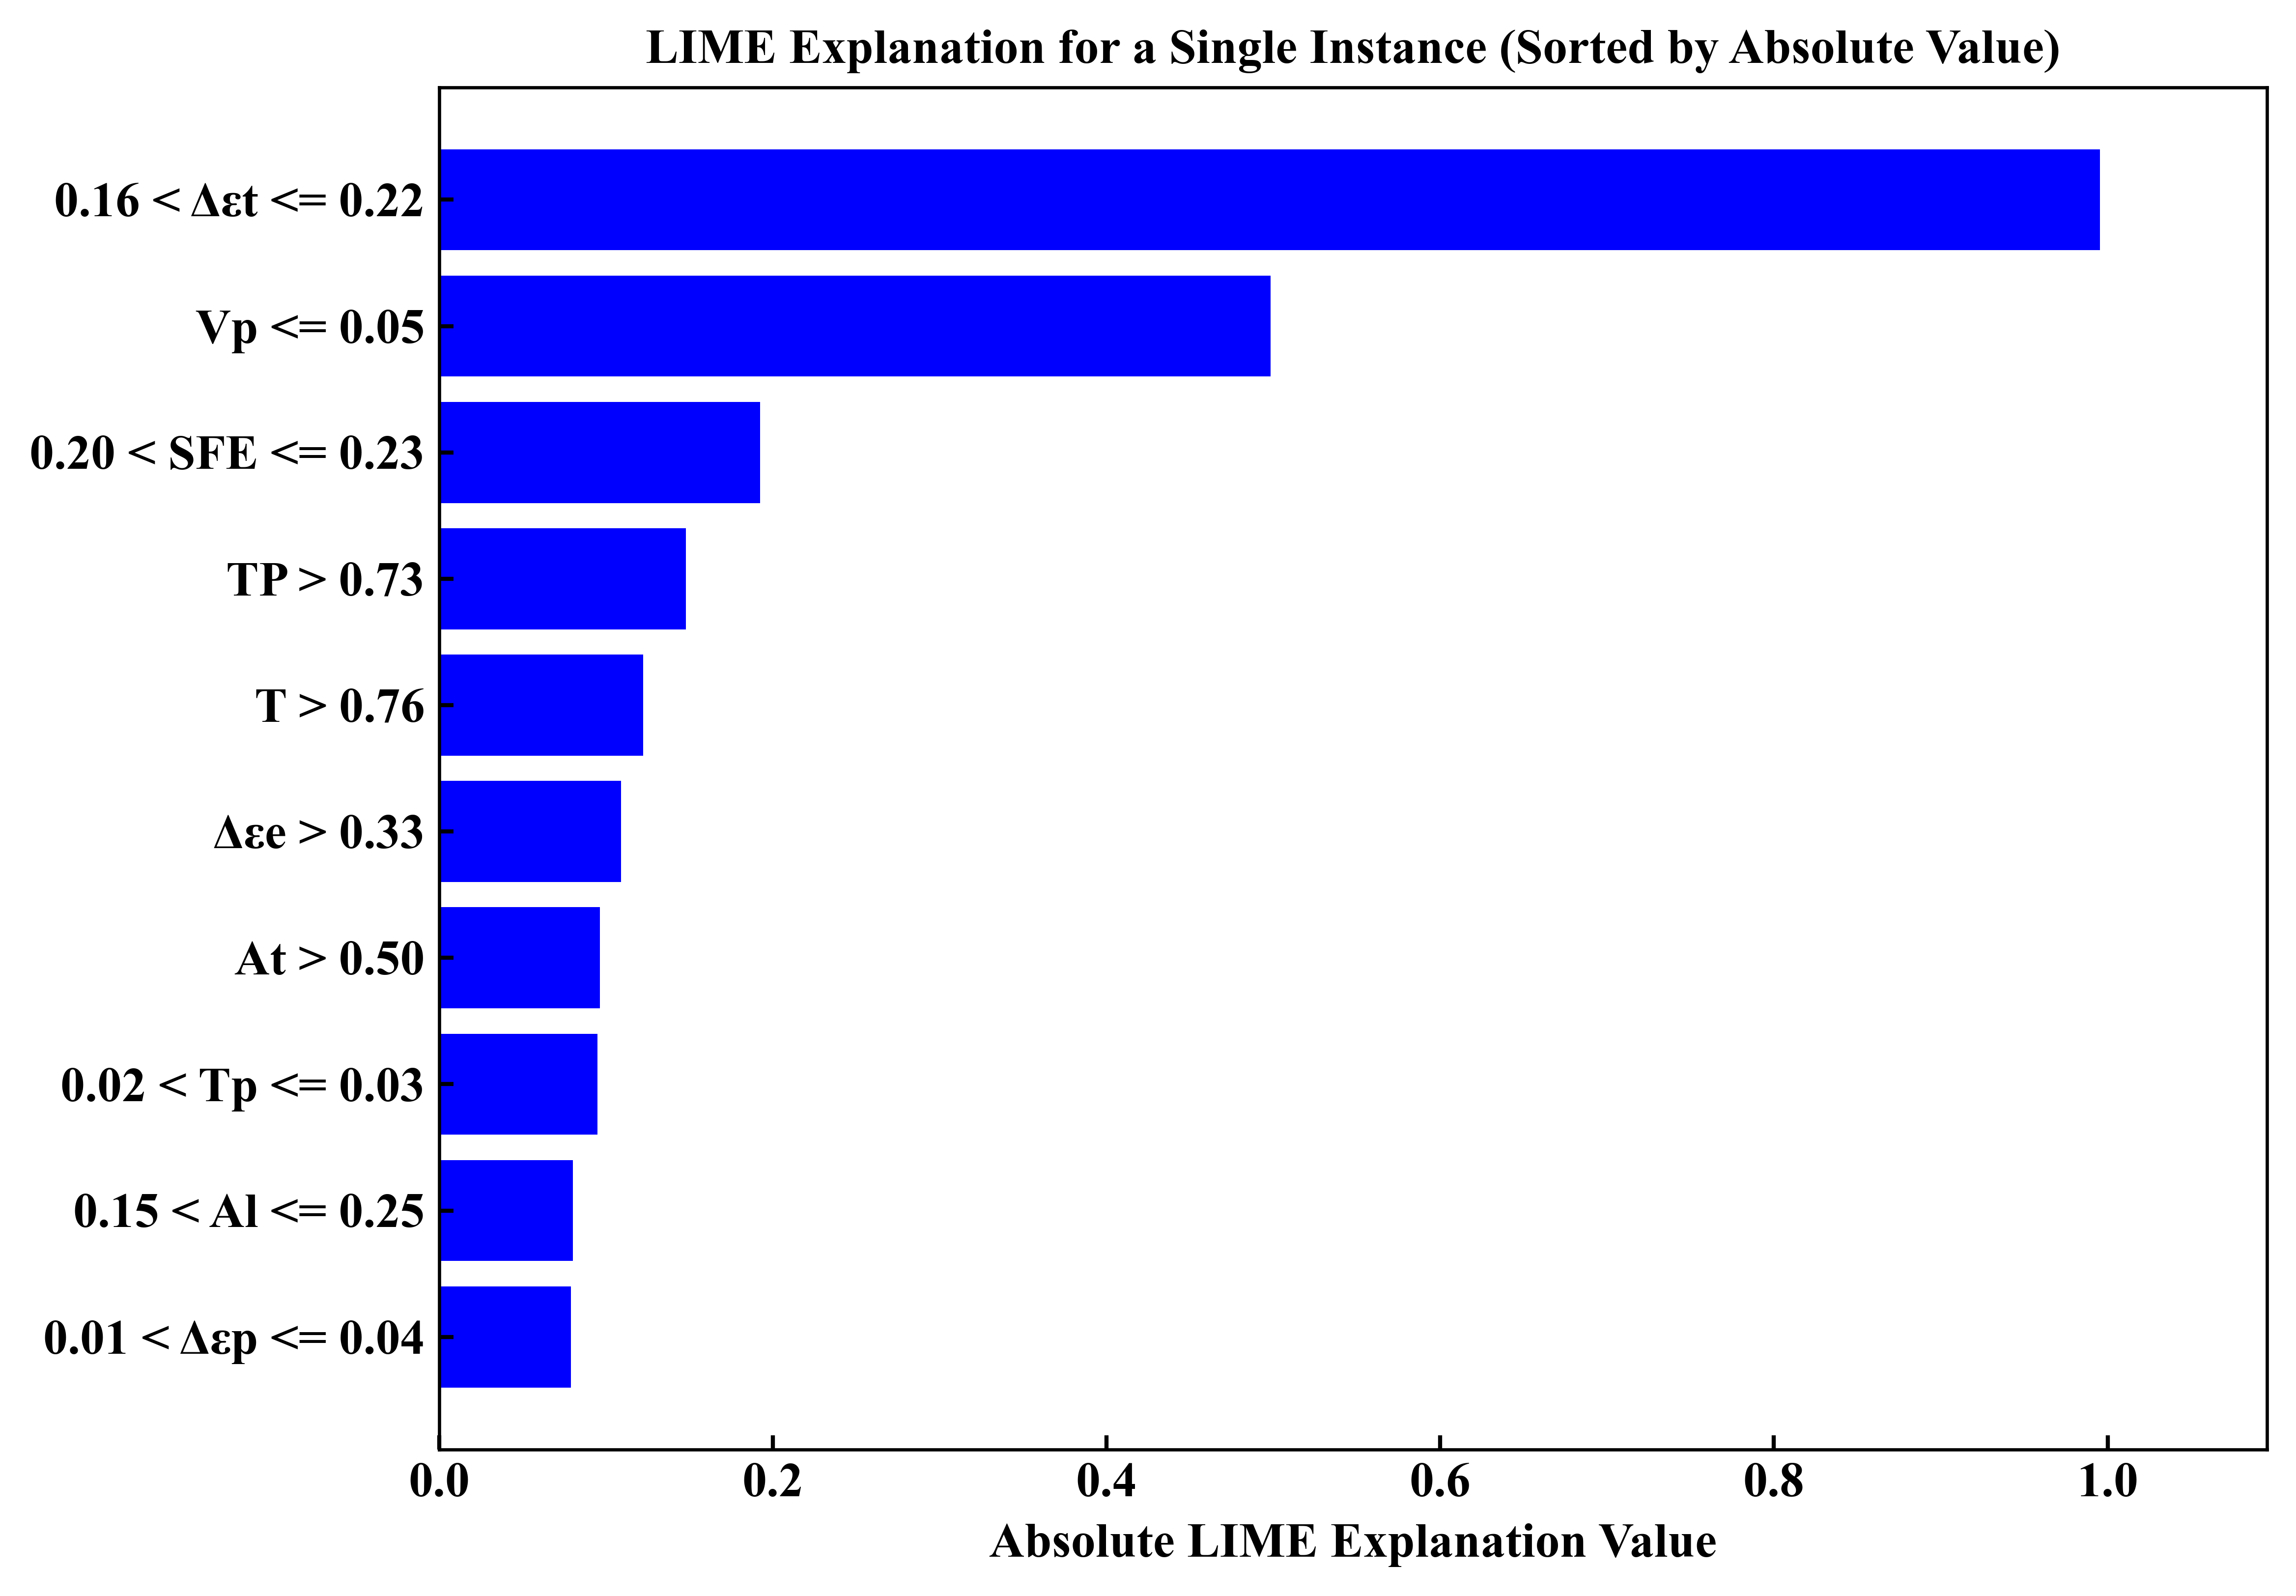

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# Load data
features = pd.read_excel('LIME.xlsx')
label1 = features['2Nf'].to_numpy()
label1 = label1 / 2
features = features.drop(['2Nf'], axis=1)
feature_names = features.columns  # Extract column names before conversion
features = MinMaxScaler().fit_transform(features)
label1 = np.log(label1)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, label1, test_size=0.25, random_state=42)

# Convert feature names to a list
feature_names_list = list(feature_names)

# Increase the weight of the 'T' feature
X_val_weighted = X_val.copy()  # Make a copy of the validation set

# Identify the index of the 'T' feature in the feature names list
t_feature_index = feature_names_list.index('T')

# Increase the values of the 'T' feature in the validation set
T_multiplier = 2  # Adjust this multiplier as needed
X_val_weighted[:, t_feature_index] *= T_multiplier

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Create the LIME explainer
explainer = LimeTabularExplainer(X_train, feature_names=feature_names_list,
                                 class_names=['log(2Nf/2)'], verbose=True, mode='regression')

# Choose an instance to explain (for example, the first instance in the validation set)
instance_index = 0
instance = X_val_weighted[instance_index]

# Explain the prediction for the chosen instance
explanation = explainer.explain_instance(instance, model.predict, num_features=10)

# Extract the LIME explanation values and feature names
exp_values = explanation.as_list()

# Sort the values by absolute magnitude
exp_values_sorted = sorted(exp_values, key=lambda x: abs(x[1]), reverse=True)

# Prepare data for plotting
features_sorted = [x[0] for x in exp_values_sorted]
values_sorted = [abs(x[1]) for x in exp_values_sorted]  # Take the absolute value

# Plot the explanation
plt.figure(figsize=(8, 6), dpi=600)  # Set figure resolution to 600 dpi
plt.barh(features_sorted, values_sorted, color='blue')  # Set bar color to blue
plt.xlabel('Absolute LIME Explanation Value', fontsize=12, fontweight='bold', fontname='Times New Roman')
plt.title('LIME Explanation for a Single Instance (Sorted by Absolute Value)', fontsize=12, fontweight='bold', fontname='Times New Roman')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top

# Adjust x-axis range dynamically
plt.xlim(0, max(values_sorted) + 0.1)
plt.xticks(fontsize=12, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=12, fontweight='bold', fontname='Times New Roman')

# Set tick direction to 'in'
plt.tick_params(axis='both', direction='in', width=1)  # Set tick direction to 'in' and tick width

plt.show()

Intercept 7.252694868727307
Prediction_local [5.79760903]
Right: 6.829576126618634
Intercept 6.632507771251941
Prediction_local [7.74645628]
Right: 8.114561881233643
Intercept 6.956514686781716
Prediction_local [6.87480794]
Right: 6.994381744399331
Intercept 6.72601553607419
Prediction_local [7.40917642]
Right: 7.569743274396041
Intercept 6.4590546003881295
Prediction_local [8.34769555]
Right: 7.928678129193822
Intercept 6.561421631229301
Prediction_local [8.02956919]
Right: 7.612624484262555
Intercept 6.968739764781531
Prediction_local [6.74876727]
Right: 6.37012040340358
Intercept 7.610410041628727
Prediction_local [4.6691862]
Right: 5.330210049695617
Intercept 6.560796505057915
Prediction_local [7.95169333]
Right: 8.96848513997454
Intercept 7.134787138564996
Prediction_local [6.30067676]
Right: 6.722095686574789
Intercept 7.080265965953064
Prediction_local [6.36933945]
Right: 8.723680150403789
Intercept 7.495508029427702
Prediction_local [5.10414461]
Right: 4.9547417166314816
Interc

Intercept 6.109357552578735
Prediction_local [9.30183939]
Right: 8.3424297371058
Intercept 7.543000193363121
Prediction_local [4.96852325]
Right: 5.193688630239607
Intercept 6.154292092127017
Prediction_local [9.22456562]
Right: 9.266999174935624
Intercept 7.010220727378906
Prediction_local [6.47758756]
Right: 6.168346153955611
Intercept 7.207079022687322
Prediction_local [6.01862678]
Right: 7.456394949776175
Intercept 7.165741060885386
Prediction_local [6.32053135]
Right: 7.784882952871864
Intercept 7.046335495119107
Prediction_local [6.47204456]
Right: 7.738325581226154
Intercept 6.6071487893393686
Prediction_local [7.85659422]
Right: 9.568111782786618
Intercept 6.391093867584274
Prediction_local [8.26994043]
Right: 7.751586112917698
Intercept 6.415010824683679
Prediction_local [8.36888388]
Right: 7.43773499467577
Intercept 7.684872419816841
Prediction_local [4.73183912]
Right: 4.82300268124863
Intercept 7.238173562684659
Prediction_local [5.98998657]
Right: 6.054184620259763
Interce

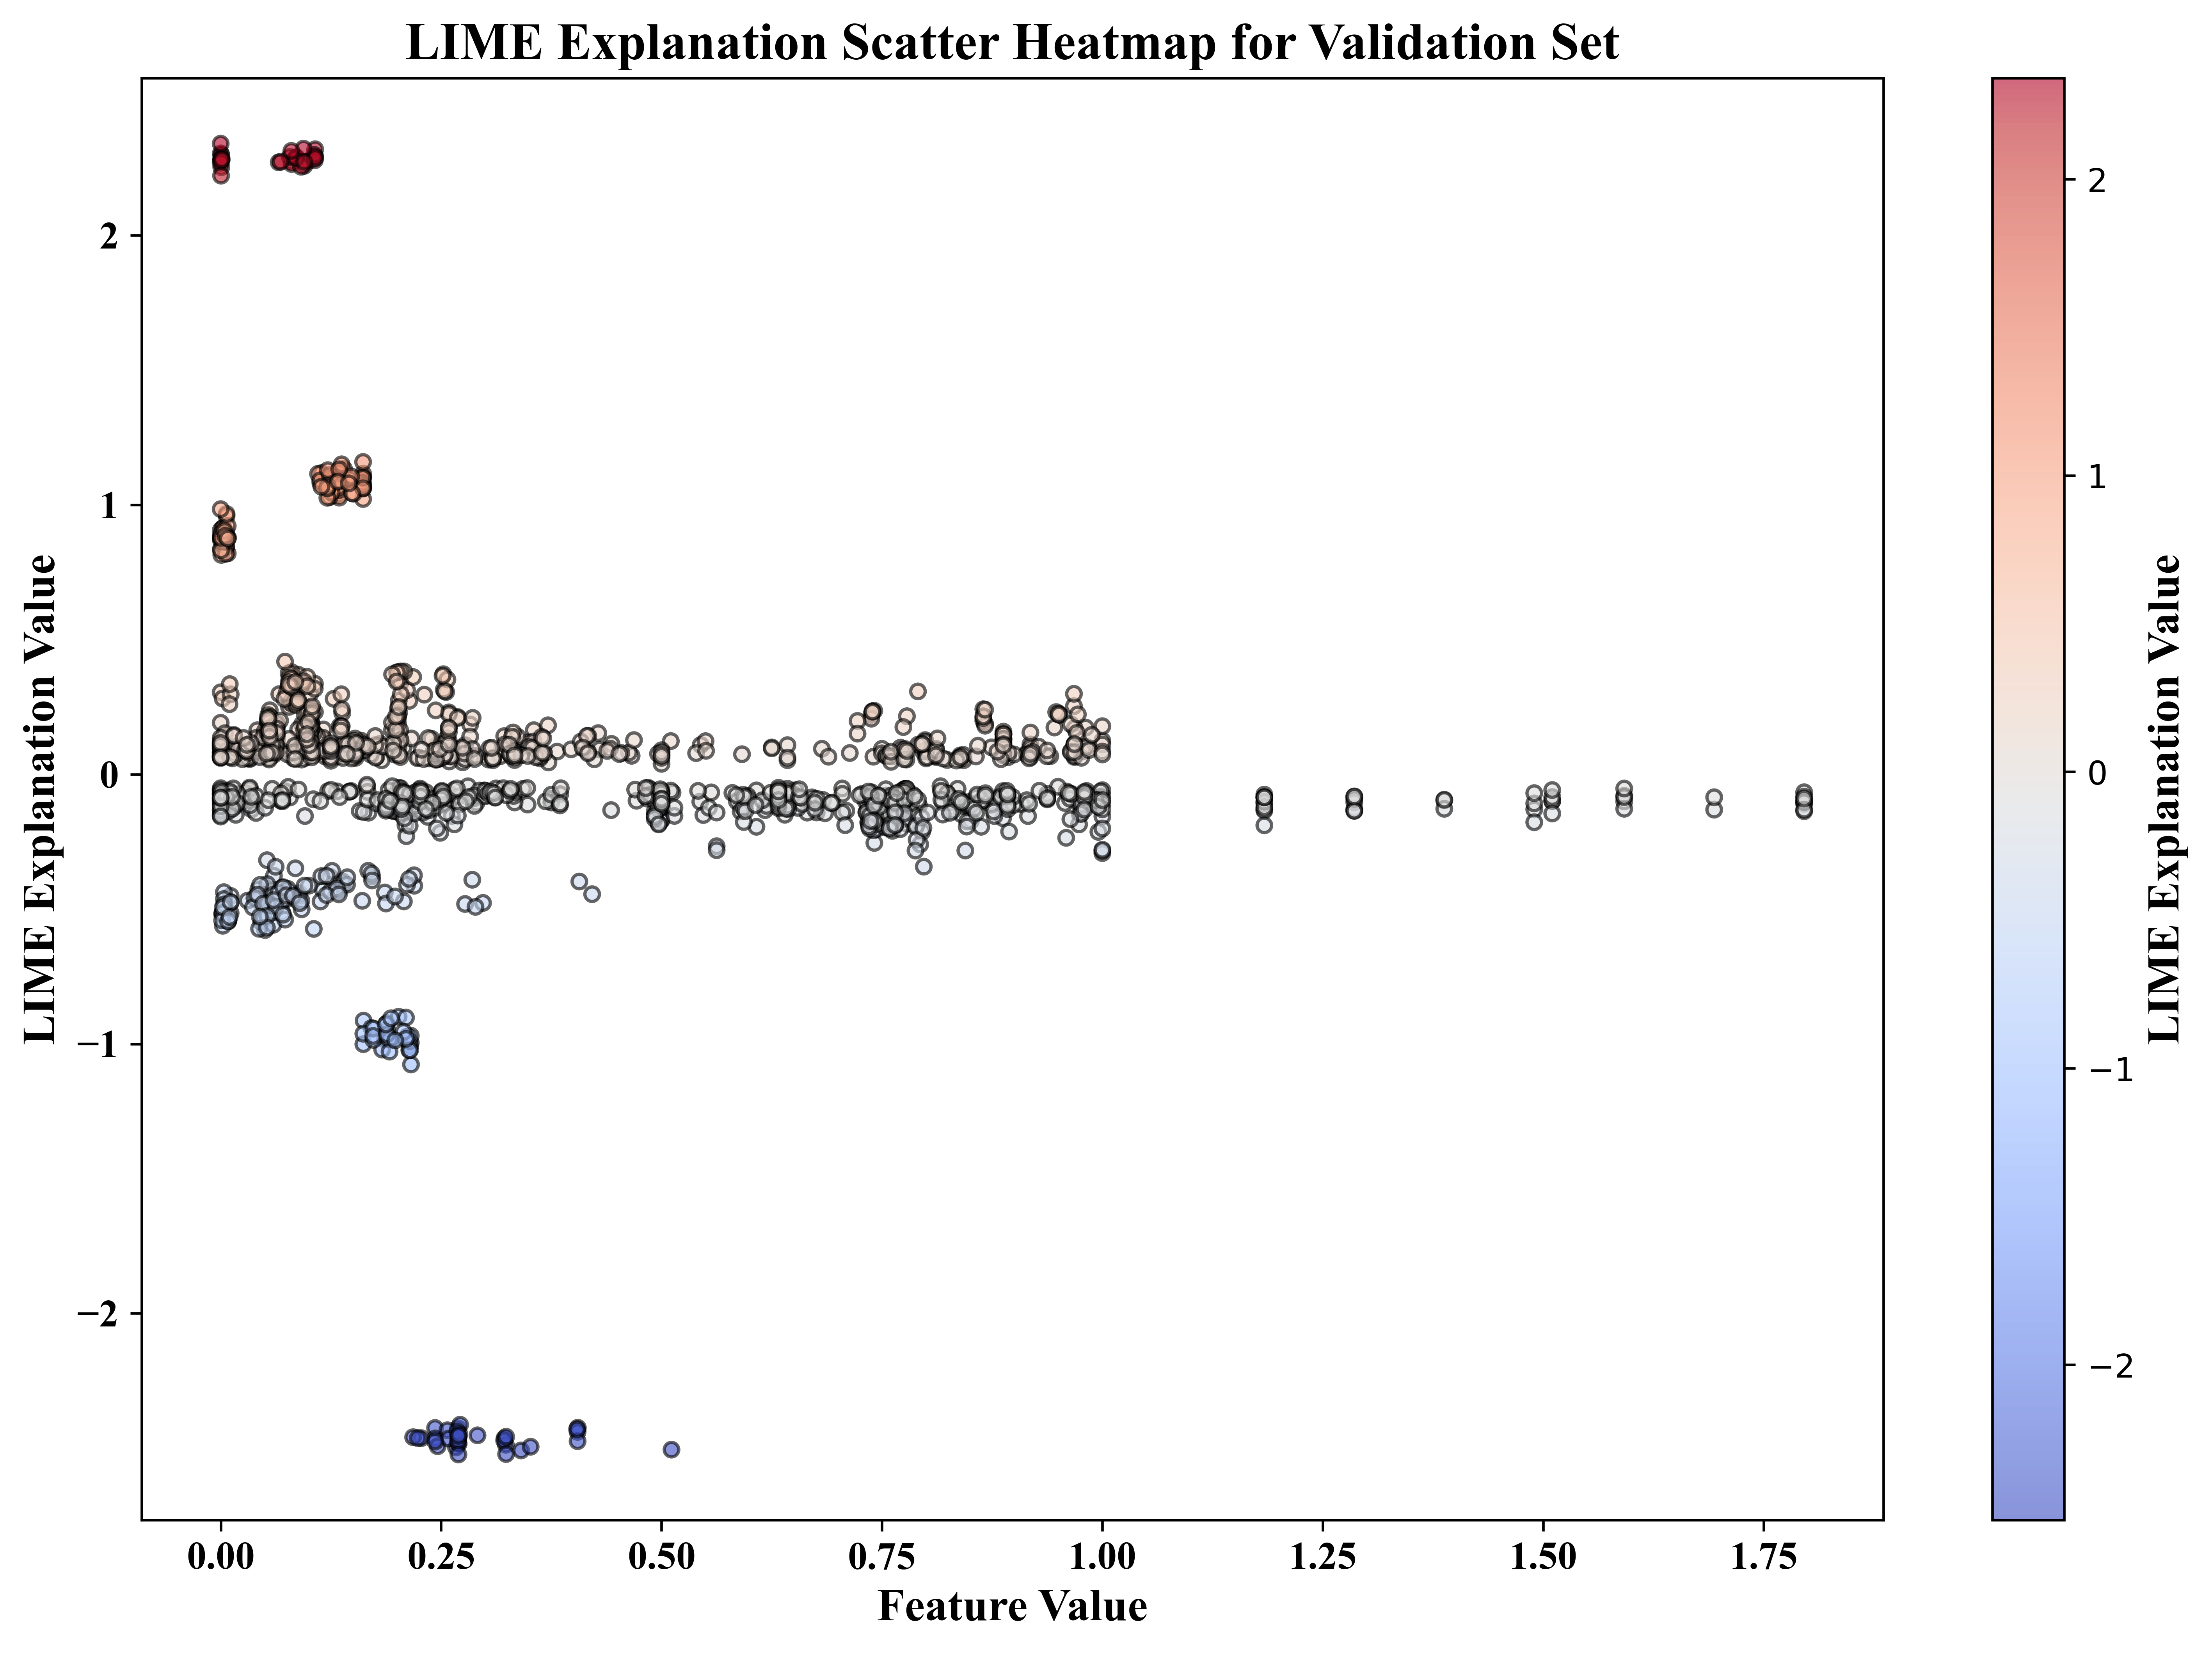

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from lime.lime_tabular import LimeTabularExplainer

# Load data
features = pd.read_excel('LIME.xlsx')
label1 = features['2Nf'].to_numpy()
label1 = label1 / 2
features = features.drop(['2Nf'], axis=1)
feature_names = features.columns  # Extract column names before conversion
features = MinMaxScaler().fit_transform(features)
label1 = np.log(label1)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, label1, test_size=0.25, random_state=42)

# Convert feature names to a list
feature_names_list = list(feature_names)

# Increase the weight of the 'T' feature
X_val_weighted = X_val.copy()  # Make a copy of the validation set

# Identify the index of the 'T' feature in the feature names list
t_feature_index = feature_names_list.index('T')

# Increase the values of the 'T' feature in the validation set
T_multiplier = 2  # Adjust this multiplier as needed
X_val_weighted[:, t_feature_index] *= T_multiplier

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Create the LIME explainer
explainer = LimeTabularExplainer(X_train, feature_names=feature_names_list,
                                 class_names=['log(2Nf/2)'], verbose=True, mode='regression')

# Explain the predictions for the entire validation set
explanations = [explainer.explain_instance(X_val_weighted[i], model.predict, num_features=10) for i in range(len(X_val_weighted))]

# Extract and compile LIME explanation values for all instances
exp_values = []
exp_features = []
exp_instance_values = []

for i, explanation in enumerate(explanations):
    local_exp = dict(explanation.local_exp[1])
    for feature_index, value in local_exp.items():
        feature_name = feature_names_list[feature_index]
        exp_features.append(feature_name)
        exp_values.append(value)
        exp_instance_values.append(X_val_weighted[i, feature_index])

# Prepare data for plotting
lime_data = pd.DataFrame({
    'Feature': exp_features,
    'LIME Explanation Value': exp_values,
    'Feature Value': exp_instance_values
})

# Plot the scatter heatmap
plt.figure(figsize=(12, 8), dpi=600)
scatter = plt.scatter(
    lime_data['Feature Value'],
    lime_data['LIME Explanation Value'],
    c=lime_data['LIME Explanation Value'],
    cmap='coolwarm',
    s=20,
    edgecolor='k',
    alpha=0.6
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('LIME Explanation Value', fontsize=14, fontweight='bold', fontname='Times New Roman')

# Customize plot
plt.xlabel('Feature Value', fontsize=14, fontweight='bold', fontname='Times New Roman')
plt.ylabel('LIME Explanation Value', fontsize=14, fontweight='bold', fontname='Times New Roman')
plt.title('LIME Explanation Scatter Heatmap for Validation Set', fontsize=16, fontweight='bold', fontname='Times New Roman')

# Adjust tick labels
plt.xticks(fontsize=12, fontweight='bold', fontname='Times New Roman')
plt.yticks(fontsize=12, fontweight='bold', fontname='Times New Roman')

plt.show()